## HW2: Linear Discriminant Analysis
In hw2, you need to implement [Fisher’s linear discriminant](https://towardsdatascience.com/fishers-linear-discriminant-intuitively-explained-52a1ba79e1bb) by using only numpy, then train your implemented model by the provided dataset and test the performance with testing data

Please note that only **NUMPY** can be used to implement your model, you will get **zero point** by simply calling `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` 

## Load data

In [1]:
import numpy as np
import math
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
x_train, x_test, y_train, y_test = np.load('classification_data.npy', allow_pickle=True)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3750, 2)
(3750,)
(1250, 2)
(1250,)


## 1. Compute the mean vectors mi, (i=1,2) of each 2 classes

In [4]:
## Your code HERE
# initialization
n1, n2 = 0, 0
m1, m2 = np.array([0.0, 0.0]), np.array([0.0, 0.0])

# count N and m for each class
for i in range(len(x_train)):
    if y_train[i] == 0:
        n1 += 1
        m1 += x_train[i]
    else:
        n2 += 1
        m2 += x_train[i]

m1 /= n1
m2 /= n2

In [5]:
print(f"mean vector of class 1: \n{m1}", f"\nmean vector of class 2: \n{m2}")

mean vector of class 1: 
[ 0.99253136 -0.99115481] 
mean vector of class 2: 
[-0.9888012   1.00522778]


## 2. Compute the Within-class scatter matrix SW

In [6]:
## Your code HERE
# S_W = \sum_{n\in c_1}(X_n - m_1)(X_n - m_1)^T + \sum_{n\in c_2}(X_n - m_2)(X_n - m_2)^T
sw = np.array([[0.0, 0.0], [0.0, 0.0]])
for i in range(len(x_train)):
    # calculate outer depending on their class
    if y_train[i] == 0:
        temp_w = x_train[i] - m1
        sw += np.outer(temp_w, temp_w)
    else: 
        temp_w = x_train[i] - m2
        sw += np.outer(temp_w, temp_w)

In [7]:
print(f"Within-class scatter matrix SW: \n{sw}")

Within-class scatter matrix SW: 
[[ 4337.38546493 -1795.55656547]
 [-1795.55656547  2834.75834886]]


## 3.  Compute the Between-class scatter matrix SB

In [8]:
## Your code HERE
# S_B = (m_2 - m_1)(m_2 - m_1)^T
temp_b = m2 - m1
sb = np.outer(temp_b, temp_b)

In [9]:
print(f"Between-class scatter matrix SB: \n{sb}")

Between-class scatter matrix SB: 
[[ 3.92567873 -3.95549783]
 [-3.95549783  3.98554344]]


## 4. Compute the Fisher’s linear discriminant

In [10]:
## Your code HERE
# w \propto S_W^{-1}(m_2 - m_1)
w = np.linalg.inv(sw) @ temp_b
# normalize the length of w
w *= 1 / math.sqrt(w[0] ** 2 + w[1] ** 2)

In [11]:
print(f"Fisher’s linear discriminant: \n{w}")

Fisher’s linear discriminant: 
[-0.37003809  0.92901658]


## 5. Project the test data by linear discriminant and get the class prediction by `K` nearest-neighbor rule. Please report the accuracy score with `K` values from 1 to 5
you can use `accuracy_score` function from `sklearn.metric.accuracy_score`

In [12]:
# project x_train to w
projections = []
for i in range(len(x_train)):
    l = x_train[i] @ w
    projections.append(l * w)

# find k closest point of a x_test projection
def k_closest(k, proj):
    distance = []
    for j in range(len(projections)):
        distance.append([abs(proj[0] - projections[j][0]), j])
    distance = sorted(distance, key=lambda l:l[0])[:k]
    c1, c2 = 0, 0
    for it in distance:
        if y_train[it[1]] == 0:
            c1 += 1
        else:
            c2 += 1
    if c1 > c2:
        return 0
    elif c2 > c1:
        return 1
    # if c1 = c2: choose the class of the cloest point
    else:
        return y_train[distance[0][1]]
    
# test the accuracy from k = 1 ~ 5
for k in range(1, 6):
    y_pred = []    
    for i in range(len(x_test)):
        proj = (x_test[i] @ w) * w
        y_pred.append(k_closest(k, proj))
    acc = accuracy_score(y_test, y_pred)
    print(f"k = {k}: Accuracy of test-set {acc}")

k = 1: Accuracy of test-set 0.8488
k = 2: Accuracy of test-set 0.8488
k = 3: Accuracy of test-set 0.8792
k = 4: Accuracy of test-set 0.8824
k = 5: Accuracy of test-set 0.8912


## 6. Plot the 1) best projection line on the training data and show the slope and intercept on the title (you can choose any value of intercept for better visualization) 2) colorize the data with each class 3) project all data points on your projection line. Your result should look like [this image](https://i.imgur.com/tubMQpw.jpg)

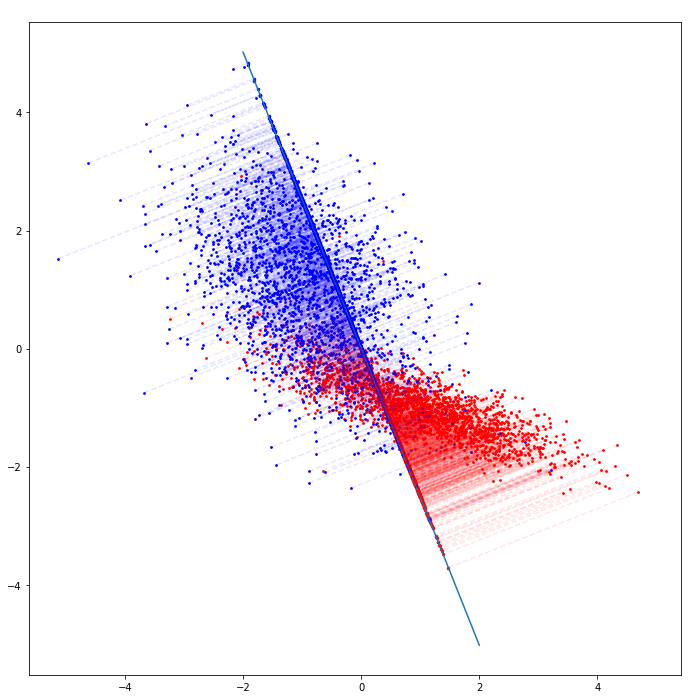

In [13]:
# distribute points in x_train and projection 
# to different lists according to its class
c1, c2 = [], []
cp1, cp2 = [], []
for i in range(len(x_train)):
    if y_train[i] == 0:
        c1.append(x_train[i])
        cp1.append(projections[i])
    else:
        c2.append(x_train[i])
        cp2.append(projections[i])

# extract x and y from lists
x1, y1 = np.array(c1).T
x2, y2 = np.array(c2).T
xp1, yp1 = np.array(cp1).T
xp2, yp2 = np.array(cp2).T
x_t, y_t = x_train.T
x_p, y_p = np.array(projections).T

# plot the figure
plt.figure(figsize=(12, 12))
plt.title(f"Projection Line: w={w[1] / w[0]}, b={0}", color='white')

# plot projection line
x = np.linspace(-2, 2)
y = (w[1] / w[0]) * x
plt.plot(x, y)

# plot scatter points in x_train and projection
plt.scatter(x1, y1, color='red', s=3)
plt.scatter(x2, y2, color='blue', s=3)
plt.scatter(xp1, yp1, color='red', s=6)
plt.scatter(xp2, yp2, color='blue', s=6)

# plot the line between points in x_train and its projection
plt.plot([x1, xp1], [y1, yp1], alpha=0.1, color='red', linestyle='dashed')
plt.plot([x2, xp2], [y2, yp2], alpha=0.1, color='blue', linestyle='dashed')

# reshape the figure to a square
plt.gca().axis('square')
plt.show()